# Regression

### Regression analysis is used to:
- Predict the value of a **`dependent variable`** based on the value of at least one **`independent variable`**
- Explain the impact of changes in an **`independent variable`** on the **`dependent variable`**

### Dependent variable:    
- the variable we wish to predict or explain

### Independent variable:  
- the variable used to predict or explain the **`dependent variable`**

# Simple Linear Regression Model

- Only one independent variable, X
- Relationship between  X  and  Y  is described by a linear function
- Changes in Y are assumed to be related to changes in X

### Types of relationship:

- Weak
- No relationship
- Strong


We want to find the best line **`(linear function y = f(x))`** to explain the data.
In **`supervised machine learning`**, we always have **`train data`** (inputs and known outputs), **`test data`**(just inputs).

### Inputs can be: 

- political situation 
- financial conditions
- weekday 
- working day 
- weather 
- holiday, etc.


The idea of **`Linear Regression`** is to find a function that will fit the training samples in the most optimal way.
Imagine that each training sample corresponds to one point in the picture.
So the idea is to draw the line that would fit all points the best way.
Anyway, let’s look how linear regression works.


**`Linear models`** are a class of models that are widely used in practice and Linear models make a prediction using a linear function of the input features.

For regression, the general prediction formula for a linear model looks as follows:
**`ŷ = a[0] * x[0] + a[1] * x[1] + ... + a[p] * x[p] + b`**

Here, **`x[0]`** to **`x[p]`** denotes the features (for example, columns in a file) of a single data point, a and b are parameters of the model that are learned, and ŷ is the prediction the model makes. For a dataset with a single feature, this is:
**`ŷ = a[0] * x[0] + b`**

**`a[0]`** is the slope and b is the y-axis offset (y - intercept). For more features, a contains the slopes along each feature axis. Alternatively, we can think of the predicted response as being a weighted sum of the input features, with weights (which can be negative) given by the entries of a.


When you compare the predictions made by the straight line with those made by the **`KNeighborsRegressor`** as shown in Figure, using a straight line to make predictions seems very restrictive.

It looks like all the fine details of the data are lost. In a logical way, this is true. It is a strong assumption that our target y is a linear combination of the features. 

For datasets with many features, **`Linear Models`** can be very powerful. In particular, if you have more features than **`training data`** points, any target y can be perfectly modeled (on the training set) as a **`linear function.`**

There are many different linear models for regression. The difference between these models lies in how the model parameters a and b are learned from the training data, and how model complexity can be controlled. 

### **The control of parameters (a and b) can be described by L1 and L2 regularization.**


# Linear Regression (aka Ordinary Least Squares)

**`Linear regression`**, or ordinary least squares (OLS), is the simplest and most classic linear method for Regression. 

**`Linear regression`** finds the parameters a and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. 

The **`mean squared error`** is the sum of the squared differences between the predictions and the true values. 
**`Linear regression`** has no parameters, which is a benefit, but it also has no way to control model complexity.


In [1]:
%matplotlib inline
from preamble import*


w[0]: 0.393906  b: -0.031804


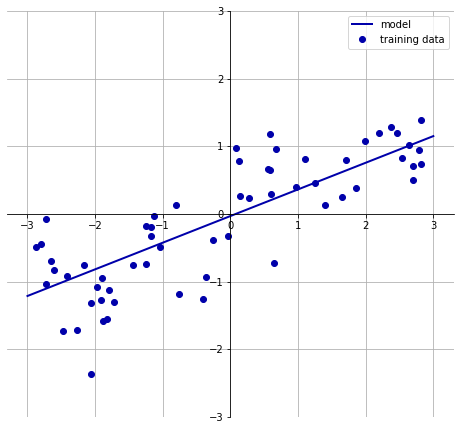

In [2]:
mglearn.plots.plot_linear_regression_wave()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.394]
lr.intercept_: -0.03180434302675976


In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


**`R2`** of around 0.66 is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely **`underfitting`**, not **`overfitting`**.
For this one-dimensional dataset, there is little danger of **`overfitting`**, as the model is very simple (or restricted). 
With higher-dimensional datasets (meaning datasets with a large number of features), **`linear models`** become more powerful, and there is a higher chance of **`overfitting`**.


# Boston dataset

Let’s take a look at how **`LinearRegression`** performs on a more complex dataset, like the Boston Housing dataset.

Remember that this dataset has 506 samples and 105 derived features. First, we load the dataset and split it into a **`training`** and a **`test set`**. 

Then we build the linear regression model as before:


In [7]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [8]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This difference between performance on the **`training set`**  and the **`test set`** is a clear sign of **`overfitting`**, and therefore we should try to find a model that allows us to control complexity. 


# Ridge Regression

- **`Ridge regression`** is a linear model for regression based on the similar formula as we used for linear regression (ordinary least squares). In ridge regression, the coefficients (a) are used for training the data, but also to fit an additional constraint. 

- **`Regularization`** means explicitly restricting a model to avoid overfitting. We reduce the magnitude of coefficients to be as small as possible; in other words, all entries of a should be close to zero. This is called as L1 regularization. L1 can be used for feature selection. 

- **`L2 regularization`** forces the weights to be small but does not make them zero and does non sparse solution. L2 tends to shrink the coefficients evenly. The particular kind used by ridge regression is known as L2 regularization.


In [9]:
# alpha default value = 1

from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


We observe that the training set score of **`Ridge`** is lower than for **`LinearRegression`**, while the test set score is higher. 

- **`Ridge`** is a more restricted model, so there are less chances of **`overfitting`**. A less complex model means worse performance on the **`training set`**, but better **`generalization`**. 
- We are interested in **`generalization`** performance, we should choose the **`Ridge`** model over the **`LinearRegression`** model.
- The **`Ridge`** model makes a trade-off between the simplicity of the model (near-zero coefficients) and its performance on the **`training set`**. 
- How much importance the model places on simplicity versus training set performance can be specified by the user, using the **`alpha`** parameter. 


In [20]:
# alpha = 10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [21]:
# alpha = 0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


In [22]:
# alpha = 1
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


- We can obtain best trade-off by tuning the **`alpha`** parameter.
- The optimum setting of **`alpha`** depends on the particular dataset we are using. 
- Increasing **`alpha`** forces coefficients to move more toward zero, which decreases **`training set`** performance but might help **`generalization`**.

- If **`alpha`** = 0.1 seems to be working well. We can check decreasing alpha even more to improve generalization.

## Default parameter **`alpha`** = 1.0



# Effect of alpha for Ridge Regression

### Compairing the alphas values

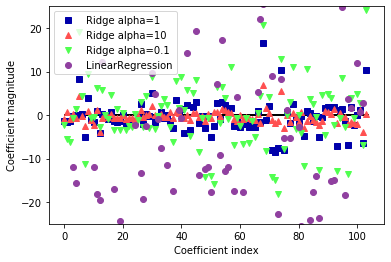

In [23]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

We can get a more **`qualitative`** insight into how the **`alpha`** parameter changes the model by inspecting the **`coef_`** attribute of models with different values of **`alpha`**. 

A higher alpha means a more restricted model, so we can expect the entries of **`coef_`** to have smaller magnitude for a high value of **`alpha`**  than for a low value of **`alpha`** .


- The x-axis enumerates the entries of **`coef_`**: x = 0 shows the coefficient associated with the first feature, x = 1 the coefficient associated with the second feature, and so on up to x = 100. 

- The y-axis shows the numeric values of the corresponding values of the coefficients. It is evident when **`alpha`** = 10, the coefficients are mostly between around -3 and 3. 

- The coefficients for the **`Ridge model`** with **`alpha`** = 1 are somewhat larger. The dots corresponding to **`alpha`** = 0.1 have larger magnitude, and many of the dots corresponding to **`linear regression`** without any **`regularization`** (which would be alpha = 0) are so large they are outside of the chart.

- Another way to understand the influence of regularization is to fix a value of **`alpha`** but vary the amount of **`training data`** available. 


### Learning curves for ridge regression and linear regression on the Boston Housing dataset


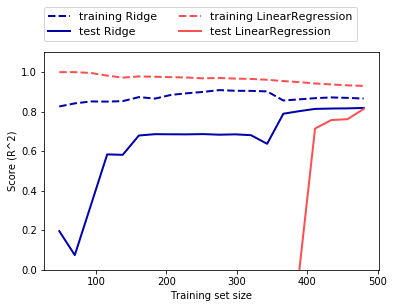

In [24]:
mglearn.plots.plot_ridge_n_samples()

- We subsampled the Boston Housing dataset and evaluated **`LinearRegression`** and **`Ridge model`**(**`alpha`** = 1) on subsets of increasing size.

- The training score is higher than the test score for all dataset sizes, for both ridge and linear regression. Because ridge is regularized. The training score of ridge is lower than the training score for linear regression across the board. However, the test score for ridge is better, particularly for small subsets of the data.

For less than 400 data points, linear regression is not able to learn anything. As more data becomes available to the model, both models improve, and linear regression catches up with ridge in the end. 

The result is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance.


# Lasso Regression

An alternative to **`Ridge`** for regularizing linear regression is **`Lasso`**. 

With **`Ridge`** Regression, using the **`Lasso`** also restricts coefficients to be close to zero, but in a slightly different way, called **`L1 regularization`**.

The consequence of **`L1 regularization`** is that when using the **`Lasso`**, some coefficients are exactly zero. 

This means some features are entirely ignored by the model. Having some coefficients be exactly zero makes a model easier to interpret, and can reveal the most important features of your model. Let’s apply the lasso to the extended Boston Housing dataset:


In [25]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


**max_iter : int, default: 300 Maximum number of iterations of the k-means algorithm for a single run. But in my opinion if I have 100 Objects the code must run 100 times, if I have 10.000 Objects the code must run 10.000 times to classify every object.**

It is clear that **`Lasso`** does quite badly, both on the training and the test set. (Training set score: 0.29, Test set score: 0.21, Number of features used: 4)

This indicates that we are **`underfitting`**, and we find that it used only 4 of the 105 features.

Similarly to **`Ridge`**, the **`Lasso`** also has a regularization parameter, alpha, that controls how strongly coefficients are pushed toward zero. 

We used the default of **`alpha`** = 1.0. To reduce **`underfitting`**, decrease **`alpha`** (0.01). When we do this, we need to increase the default setting of **`max_iter`** (the maximum number of iterations to run).


In [27]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
# alpha = 0.1

lasso001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


A lower **`alpha`** allowed us to fit a more complex model, which worked better on the training and test data. 
The performance is slightly better than using **`Ridge`**, and we are using only 33 of the 105 features.

This makes this model potentially easier to understand. If we set **`alpha`** too low, however, we again remove the effect of regularization and end up **`overfitting`**, with a result similar to **`LinearRegression`**.


In [29]:
# alpha = 0.01

lasso00001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [30]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


# Comparison of Coefficient Magnitudes for Lasso Regression

Text(0, 0.5, 'Coefficient magnitude')

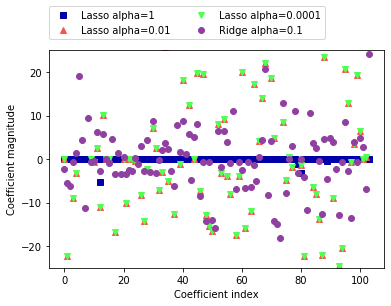

In [31]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

For **`alpha`** = 1, most of the coefficients are zero, but that the remaining coefficients are also small in magnitude. 

Decreasing **`alpha`** to 0.01, we obtain the solution shown as the green dots, which causes most features to be exactly zero. 

Using **`alpha`** = 0.00001, we get a model that is quite unregularized, with most coefficients nonzero and of large magnitude. 

For comparison, the best **`Ridge`** solution is shown in teal. 

The **`Ridge`** model with **`alpha`** = 0.1 has similar predictive performance as the lasso model with **`alpha`** = 0.01, but using **`Ridge`**, all coefficients are nonzero.


- **`Ridge Regression`** is the first choice between these two models.

- If we have a large number of features and expect only a few of them to be important, **`Lasso`** might be a better choice. 
- Similarly, if we would like to have a model that is easy to interpret, **`Lasso`** will provide a model that is easier to understand, as it will select only a subset of the input features. 

- **`Scikit-learn`** provides the ElasticNet class, which combines the penalties of **`Lasso and Ridge`**. 
- In practice, this combination works best, though at the price of having two parameters to adjust: one for the **`L1 regularization`**, and one for the **`L2 regularization`**.


# Linear Models for Classification

Linear models are also extensively used for classification. Let’s look at binary classification first. 

In this case, a prediction is made using the following formula:

**`ŷ = a[0] * x[0] + a[1] * x[1] + ... + a[p] * x[p] + b > 0`**

The formula looks very similar to the one for linear regression, but instead of just returning the weighted sum of the features, we threshold the predicted value at zero.

### If the function is smaller than zero, we predict the class as -1; if it is larger than zero, we predict the class +1. 

This prediction rule is common to all linear models for classification.

Therefore there are many different ways to find the coefficients (a) and the intercept (b).


For linear models for regression, the output, ŷ, is a linear function of the features: a **line**, **plane**, or **hyperplane (in higher dimensions)**. 

For linear models for **`classification`**, the decision boundary is a linear function of the input. 

There are many algorithms for learning linear models. These algorithms differ in the following two ways:

- The way in which they measure how well a particular combination of coefficients and intercept fits the training data
- If and what kind of regularization they use

Different algorithms choose different ways to measure what “fitting the training set well” means. 


# Linear and Logistic Regression

The two most common linear classification algorithms are logistic regression, implemented in **`linear_model.LogisticRegression`**, and **`linear support vector machines (linear SVMs)`**, implemented in **`svm.LinearSVC (SVC stands for support vector classifier)`**.

In the case of **`Linear Regression`**, *the outcome is continuous* while in the case of **`Logistic Regression`**, the outcome is *discrete* **`(not continuous) or categorical`**.

We can apply the **`Logistic Regression`** and **`LinearSVC models`** to the forge dataset, and visualize the decision boundary as found by the linear models:


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


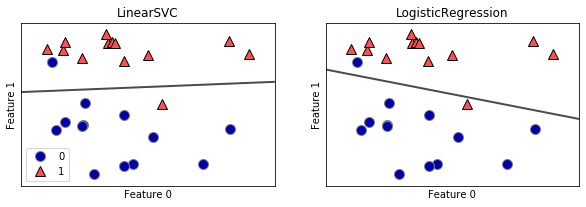

In [37]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    axes[0].legend()

We can see the decision boundaries found by **`LinearSVC`** and **`LogisticRegression`** respectively as straight lines, separating the area classified as class 1 on the top from the area classified as class 0 on the bottom (Feature 0 along x-axis and Feature 1 along y-axis)

Any new data point that lies above the black line will be classified as class 1 by the respective classifier, while any point that lies below the black line will be classified as class 0. 

For **`LogisticRegression`** and **`LinearSVC`**, the trade-off parameter that determines the strength of the regularization is called **`C`**, and *higher values of C correspond to less regularization*. 

If we use a high value of **`C`**, **`LogisticRegression`** and **`LinearSVC`** try to fit the training set as best as possible, while with low values of the parameter **`C`**, the models put more emphasis on finding a coefficient vector (a) that is close to zero.


# Decision boundaries of a linear SVM on the forge dataset for different values of **`C`**

There is an interesting aspect of how the parameter **`C`** acts. 

If we use low values of **`C`**, the algorithms try to adjust to the “majority” of data points, while using a higher value of **`C`** stresses the importance that each individual data point be classified correctly. The results obtained using **`LinearSVC`** are shown below


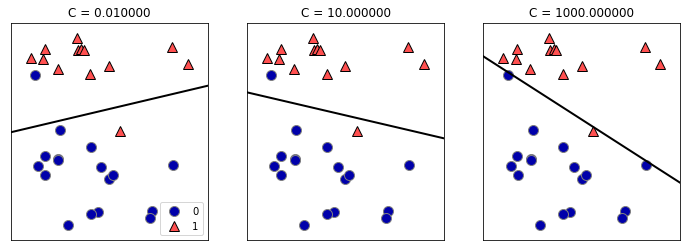

In [38]:
mglearn.plots.plot_linear_svc_regularization()

In [39]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.948
Test set score: 0.958


/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
### Changing C = 1

logreg1 = LogisticRegression(C=1).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.948
Test set score: 0.958


/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
### Changing C = 100

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.965


/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
### Changing C = 0.01

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Let’s look at the coefficients learned by the models with the three different settings of the regularization parameter **`C`**.

If we desire an interpretable model, using **`L1 regularization`** might help, as it limits the model to using only a few features. 

We can see the coefficient plot and classification accuracies for **`L1 regularization`**.


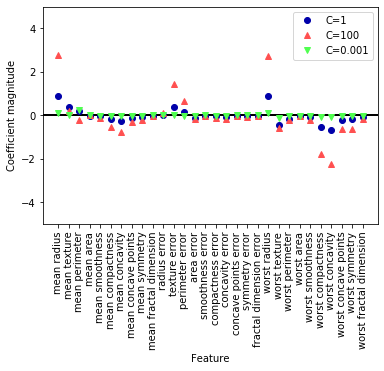

In [43]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

# Linear Models for Multiclass Classification

Many **`linear classification models`** are for **`binary classification`** only, and we need to extend to the multiclass case. A common technique to extend a binary classification algorithm to a **`multiclass classification`** algorithm is the one-vs.-rest approach. 

In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes.

To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction.

Having one binary classifier per class results in having one vector of coefficients (a) and one intercept (b) for each class. The class for which the result of the classification confidence formula given here is highest is the assigned class label:

**`a[0] * x[0] + a[1] * x[1] + ... + a[p] * x[p] + b`**


Let’s apply the one-vs.-rest method to a simple **`three-class classification`** dataset. 

We use a two-dimensional dataset, where each class is given by data sampled.

It is clear from the figure that the Two-dimensional toy dataset containing three classes.


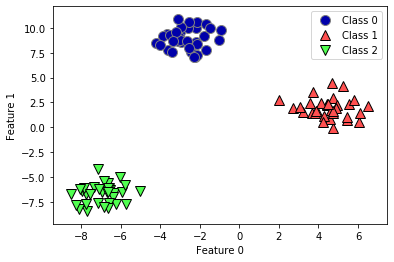

In [45]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [46]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


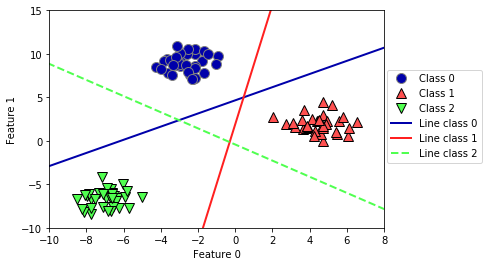

In [47]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

# Two-dimensional toy dataset containing three classes

We can see that all the points belonging to class 0 in the training data are above the line corresponding to class 0, which means they are on the “class 0” side of this binary classifier. 

The points in class 0 are above the line corresponding to class 2, which means they are classified as **`“rest”`** by the binary classifier for class 2. 

The points belonging to class 0 are to the left of the line corresponding to class 1, which means the binary classifier for class 1 also classifies them as **`“rest”`**.

Therefore, any point in this area will be classified as class 0 by the final.

What about the triangle in the middle of the plot? All three binary classifiers classify points there as **`“rest.”`** Which class would a point there be assigned to? 

### The answer is the one with the highest value for  the classification formula: the class of the closest line.


# Strengths, weaknesses, and parameters

The main parameter of linear models is the **`Regularization Parameter`**, called **`alpha`** in the regression models and **`C`** in **`LinearSVC and LogisticRegression`**. 

Large values for **`alpha`** or small values for **`C`** mean simple models. For the regression models, tuning these parameters is quite important. Usually **`C`** and **`alpha`** are searched for on a logarithmic scale. 

The other decision we have to make is whether we want to use **`L1 regularization`** or **`L2 regularization`**. 

### If we assume that only a few of features are important, we should use **`L1`**. 

### Otherwise, we should default to **`L2`**. **`L1`** can also be useful if interpretability of the model is important. Since **`L1`** will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.

**`Linear models`** are very fast to train, and also fast to predict. They scale to very large datasets and work well with sparse data. 


Another strength of linear models is that they make it relatively easy to understand how a prediction is made, using the formulas, we saw earlier for **`Regression and Classification`**.

This is rue if the dataset has highly correlated features; in these cases, the coefficients might be hard to interpret. 

Linear models perform well when the number of features is large compared to the number of samples. 

They are used on very large datasets, simply because it’s not feasible to train other models. However, in lower-dimensional spaces, other models might yield better **`generalization`** performance.

Sample datasets for Regression: https://www.kaggle.com/tags/regression
